In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import h5py
import numpy as np

In [4]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("drive/Shareddrives/anomalyResearch/million_noise_week5.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,timestamp,E,N,Z
0,2011-11-03 06:28:04,3.476157,5.053386,0.592692
1,2011-11-03 06:28:05,5.859089,4.786038,1.680098
2,2011-11-03 06:28:06,-3.357319,0.047270,3.601971
3,2011-11-03 06:28:07,-4.216561,3.572598,1.766640
4,2011-11-03 06:28:08,0.591607,6.807230,0.814311


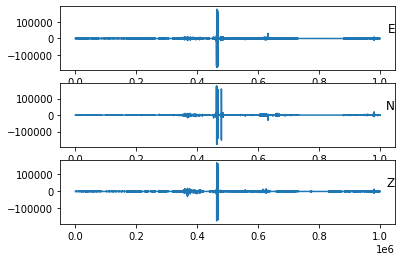

In [5]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv("drive/Shareddrives/anomalyResearch/million_noise_week5.csv", header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [6]:
import numpy as np
X_train = np.array(data[['E','N','Z']]).reshape(1000020, 3, 1)
print("Training input shape: ", X_train.shape)

Training input shape:  (1000020, 3, 1)


In [7]:
data_new = pd.read_csv("drive/Shareddrives/anomalyResearch/million_noise_label.csv") 
# Preview the first 5 lines of the loaded data 
data_new.head()

,timestamp,E,N,Z,anomaly
0,2018-01-15 00:33:36,3.476157,5.053386,0.592692,0.0
1,2018-01-15 00:33:37,5.859089,4.786038,1.680098,0.0
2,2018-01-15 00:33:38,-3.357319,0.047270,3.601971,0.0
3,2018-01-15 00:33:39,-4.216561,3.572598,1.766640,0.0
4,2018-01-15 00:33:40,0.591607,6.807230,0.814311,0.0


In [ ]:
dataset = pd.read_csv("drive/Shareddrives/anomalyResearch/million_noise_label.csv") 
data = dataset[['E','N','Z']]
data_mean = data.mean()
data_std = data.std()
#print(data_mean)
#data_normal = (data - data_mean) / data_std
#print("Number of samples:", len(data_normal))
#print(data.min())
data_normal = (data - data.min()) / (data.max()-data.min())
data_normal.head()

,E,N,Z
0,0.497619,0.499911,0.506624
1,0.497626,0.499911,0.506627
2,0.497600,0.499897,0.506633
3,0.497597,0.499907,0.506627
4,0.497611,0.499916,0.506625


In [8]:
dataset = pd.read_csv("drive/Shareddrives/anomalyResearch/million_noise_label.csv") 
data = dataset[['E','N','Z']]
data_normal = -1+2/(data.max()-data.min())*(data-data.min())
data_normal.head()

,E,N,Z
0,-0.004762,-0.000177,0.013248
1,-0.004748,-0.000179,0.013254
2,-0.004801,-0.000206,0.013266
3,-0.004805,-0.000186,0.013255
4,-0.004778,-0.000167,0.013249


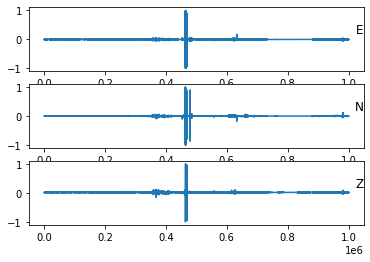

In [9]:
values = data_normal.values
groups = [0, 1, 2]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data_normal.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [37]:
new_X = np.array(data_normal[['E','N','Z']]).reshape(len(data_new), 3, 1)
new_Y = np.array(data_new[['anomaly']]).reshape(len(data_new), 1, 1)
train_X = new_X[0:int(0.9*len(data_new))]
test_X = new_X[int(0.9*len(data_new)):len(data_new)]
train_Y = new_Y[0:int(0.9*len(data_new))]
test_Y = new_Y[int(0.9*len(data_new)):len(data_new)]

In [51]:
new_X = np.array(data_normal[['E','N','Z']]).reshape(len(data_new), 3, 1)
new_Y = np.array(data_new[['anomaly']])
new_Y = to_categorical(new_Y)[:,1]
train_X = new_X[0:int(0.9*len(data_new))]
test_X = new_X[int(0.9*len(data_new)):len(data_new)]
train_Y = new_Y[0:int(0.9*len(data_new))]
test_Y = new_Y[int(0.9*len(data_new)):len(data_new)]


In [52]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(900018, 3, 1) (900018,) (100002, 3, 1) (100002,)


In [53]:
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array
import keras
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(3,1), activation='sigmoid'))
#model.add(Dropout(rate=0.2))
model.add(LSTM(100,input_shape=(3,1), activation='sigmoid'))
#model.add(Dropout(rate=0.2))
model.add(Dense(1, activation="relu"))
opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_17 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/50
12501/12501 - 119s - loss: 2.7911 - accuracy: 0.8190 - val_loss: 2.7923 - val_accuracy: 0.8190
Epoch 2/50
12501/12501 - 116s - loss: 2.7912 - accuracy: 0.8190 - val_loss: 2.7923 - val_accuracy: 0.8190
Epoch 3/50
12501/12501 - 116s - loss: 2.7912 - accuracy: 0.8190 - val_loss: 2.7923 - val_accuracy: 0.8190
Epoch 4/50
12501/12501 - 115s - loss: 2.7912 - accuracy: 0.8190 - val_loss: 2.7923 - val_accuracy: 0.8190
Epoch 5/50
12501/12501 - 115s - loss: 2.7912 - accuracy: 0.8190 - val_loss: 2.7923 - val_accuracy: 0.8190
Epoch 6/50
12501/12501 - 115s - loss: 2.7912 - accuracy: 0.8190 - val_loss: 2.7923 - val_accuracy: 0.8190


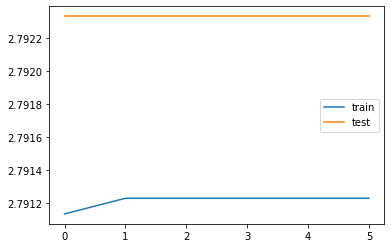

In [54]:

history = model.fit(
    train_X,
    train_Y,
    epochs=50,
    batch_size=72,
    validation_data=(test_X, test_Y),
    verbose = 2,
    shuffle=False,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
   )

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [42]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.90%


In [55]:
yhat = model.predict(test_X)
print(yhat)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = MinMaxScaler()
inv_scaled = scaler.fit_transform(inv_yhat)
obj = scaler.fit(inv_yhat)
inv_yhat = obj.inverse_transform(inv_scaled)
#inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_Y = test_Y.reshape((len(test_Y), 1))
inv_Y = concatenate((test_Y, test_X[:, 1:]), axis=1)
inv_Y = scaler.inverse_transform(inv_Y)
inv_Y = inv_Y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_Y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.000


In [ ]:
inv_Y

array([1.26832815e-11, 1.26832815e-11, 1.22583116e-11, ...,
       1.22583116e-11, 1.22583116e-11, 1.26832815e-11])

In [ ]:
inv_yhat

array([1.24864789e-11, 1.24838594e-11, 1.24729116e-11, ...,
       1.24614026e-11, 1.24743150e-11, 1.24997755e-11])

In [ ]:
data_new = pd.read_csv("drive/Shareddrives/anomalyResearch/million_noise_label.csv") 
# Preview the first 5 lines of the loaded data 
data_new.head()
#new_X = np.array(data_new[['E','N','Z']]).reshape(len(data_new), 3, 1)
new_Y = np.array(data_new[['anomaly']]).reshape(len(data_new), 1, 1)
train_X = new_X[0:int(0.9*len(data_new))]
test_X = new_X[int(0.9*len(data_new)):len(data_new)]
train_Y = new_Y[0:int(0.9*len(data_new))]
test_Y = new_Y[int(0.9*len(data_new)):len(data_new)]

In [ ]:
new_X = np.array(data_new[['E','N','Z']]).reshape(len(data_new), 3, 1)
#(x-x.min)/(x.max-x.min)
new_X = (new_X - new_X.min(0)) / new_X.ptp(0)
new_X[0:5]

array([[[0.4976192 ],
        [0.49991139],
        [0.506624  ]],

       [[0.49762599],
        [0.49991064],
        [0.50662717]],

       [[0.49759972],
        [0.49989724],
        [0.50663278]],

       [[0.49759727],
        [0.49990721],
        [0.50662743]],

       [[0.49761098],
        [0.49991635],
        [0.50662465]]])

In [ ]:
#new_X = np.array(data_new[['E','N','Z']]).reshape(len(data_new), 3, 1)
new_Y = np.array(data_new[['anomaly']]).reshape(len(data_new), 1, 1)
train_X = new_X[0:int(0.9*len(data_new))]
test_X = new_X[int(0.9*len(data_new)):len(data_new)]
train_Y = new_Y[0:int(0.9*len(data_new))]
test_Y = new_Y[int(0.9*len(data_new)):len(data_new)]

In [ ]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(900018, 3, 1) (900018, 1, 1) (100002, 3, 1) (100002, 1, 1)


In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(1,input_shape=(3,1)))
#model.add(LSTM(100, return_sequences=True, input_shape=(3,1), activation='sigmoid'))
#model.add(LSTM(1,input_shape=(3,1), activation='sigmoid'))
model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 3, 100)            40800     
_________________________________________________________________
lstm_9 (LSTM)                (None, 1)                 408       
Total params: 41,208
Trainable params: 41,208
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/50
7032/7032 - 66s - loss: 0.1810 - accuracy: 0.8190 - val_loss: 0.1810 - val_accuracy: 0.8190
Epoch 2/50
7032/7032 - 61s - loss: 0.1810 - accuracy: 0.8190 - val_loss: 0.1810 - val_accuracy: 0.8190
Epoch 3/50
7032/7032 - 60s - loss: 0.1810 - accuracy: 0.8190 - val_loss: 0.1810 - val_accuracy: 0.8190
Epoch 4/50
7032/7032 - 59s - loss: 0.1810 - accuracy: 0.8190 - val_loss: 0.1810 - val_accuracy: 0.8190
Epoch 5/50
7032/7032 - 59s - loss: 0.1810 - accuracy: 0.8190 - val_loss: 0.1810 - val_accuracy: 0.8190
Epoch 6/50
7032/7032 - 59s - loss: 0.1810 - accuracy: 0.8190 - val_loss: 0.1810 - val_accuracy: 0.8190


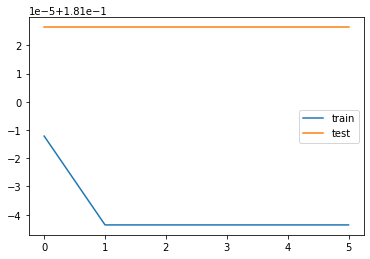

In [ ]:
# fit network
# history = model.fit(train_X, train_Y, epochs=50, batch_size=72, validation_data=(test_X, test_Y), verbose=2, shuffle=False)


history = model.fit(
    train_X,
    train_Y,
    epochs=50,
    batch_size=128,
    validation_data=(test_X, test_Y),
    verbose = 2,
    shuffle=False,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.90%


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = MinMaxScaler()
inv_scaled = scaler.fit_transform(inv_yhat)
obj = scaler.fit(inv_yhat)
inv_yhat = obj.inverse_transform(inv_scaled)
#inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_Y = test_Y.reshape((len(test_Y), 1))
inv_Y = concatenate((test_Y, test_X[:, 1:]), axis=1)
inv_Y = scaler.inverse_transform(inv_Y)
inv_Y = inv_Y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_Y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.000


In [ ]:
y_hat = model.predict(test_X)
rmse = sqrt(mean_squared_error(test_Y, yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: ignored